In [3]:
import numpy as np
import pandas as pd

In [4]:
df =pd.read_csv('emp_health.csv')

# a. Reading some rows of dataset

In [5]:

df

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...,...
1333,i11345,50,male,30.970,3,no,no,west,10600.54830
1334,i11346,18,female,31.920,0,daily,no,east,2205.98080
1335,i11347,18,female,36.850,0,weekend,no,southeast,1629.83350
1336,i11348,21,female,25.800,0,party,no,southwest,2007.94500


In [6]:
#Learn data types of all features
df.dtypes

id              object
age              int64
sex             object
bmi            float64
dependent        int64
alcohol         object
smoke           object
zone            object
expenditure    float64
dtype: object

In [7]:
df.describe()

,age,bmi,dependent,expenditure
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# 1. How many employees above 50 age smoke, what is their average expenditure on health management?

In [8]:
Age_50 = df[(df['age']>50)& (df['smoke']== 'yes')]
print(Age_50)
df_mean = Age_50["expenditure"].mean()
print(df_mean)



          id  age     sex     bmi  dependent  alcohol smoke       zone  \
11    i10023   62  female  26.290          0    daily   yes      south   
39    i10051   60    male  39.900          0    daily   yes  southwest   
55    i10067   58    male  36.955          2  weekend   yes  northwest   
58    i10070   53  female  22.880          1    daily   yes      south   
86    i10098   57  female  31.160          0       no   yes  northwest   
...      ...  ...     ...     ...        ...      ...   ...        ...   
1265  i11277   64    male  23.760          0  weekend   yes  southeast   
1284  i11296   61    male  36.300          1    daily   yes  southwest   
1301  i11313   62    male  30.875          3       no   yes       west   
1321  i11333   62    male  26.695          0    daily   yes       east   
1337  i11349   61  female  29.070          0       no   yes       west   

      expenditure  
11    27808.72510  
39    48173.36100  
55    47496.49445  
58    23244.79020  
86    43578

# 2. How many female employees did not consume alcohol daily. What is their proportion with respect to total female employees?

In [9]:
FM_donot_consume = df[(df['sex']=='female')& (df['alcohol']!= 'daily')]
print(FM_donot_consume)
l=len(df['sex']=='female')
print(l)
p=(len(FM_donot_consume)/l)*100
print(f"proportion:{p:.2f}%")

          id  age     sex    bmi  dependent  alcohol smoke       zone  \
5     i10017   31  female  25.74          0       no    no      south   
7     i10019   37  female  27.74          3  weekend    no  northwest   
9     i10021   60  female  25.84          0       no    no  northwest   
13    i10025   56  female  39.82          0  weekend    no      south   
16    i10028   52  female  30.78          1    party    no      north   
...      ...  ...     ...    ...        ...      ...   ...        ...   
1330  i11342   57  female  25.74          2       no    no  southeast   
1332  i11344   52  female  44.70          3    party    no  southwest   
1335  i11347   18  female  36.85          0  weekend    no  southeast   
1336  i11348   21  female  25.80          0    party    no  southwest   
1337  i11349   61  female  29.07          0       no   yes       west   

      expenditure  
5      3756.62160  
7      7281.50560  
9     28923.13692  
13    11090.71780  
16    10797.33620  
...

# 3.Display zone wise average expenditure of employees on health

In [10]:
avg_expd =pd.pivot_table(df, values = 'expenditure',  index = 'zone')
print(avg_expd)

            expenditure
zone                   
east       13774.679941
north      14102.583403
northeast  13694.721724
northwest  12151.702619
south      14715.689519
southeast  14452.949680
southwest  12717.083869
west       12182.998872


# 4. Employees of which zone did maximum expenditure on health

In [11]:
max_expd =pd.pivot_table(df, values = 'expenditure',  index = 'zone', aggfunc = np.max)
print(max_expd)
ma=max_expd['expenditure'].max()
print("zone with maximum expenditure",ma)

           expenditure
zone                  
east       58571.07448
north      48549.17835
northeast  46255.11250
northwest  55135.40209
south      47055.53210
southeast  63770.42801
southwest  52590.82939
west       60021.39897
zone with maximum expenditure 63770.42801


# 5. What is the minimum expenditure done by any employee in organization

In [32]:
m=min_expd['expenditure'].min()
print(" minimum expenditure by an employee",m)

 minimum expenditure by an employee 1121.8739


# 6. What is average expenditure of employees who have 2 or lesser dependents

In [13]:
depen = df[(df['dependent'] <=2)]
e=depen['expenditure']
print("The average expendature is",e.mean())

The average expendature is 13040.970970948145


# 7. How many employees are below age of 20 years. What is their average BMI

In [14]:
age_20 = df[(df['age'] <20)]
print(age_20)
l=len(age_20)
print("people below age 20 are:",l)
b=age_20['bmi']
s=b.mean()
print("average bmi =",s)

          id  age     sex     bmi  dependent  alcohol smoke       zone  \
0     i10012   19  female  27.900          0    daily   yes  southwest   
1     i10013   18    male  33.770          1  weekend    no      south   
15    i10027   19    male  24.600          1    party    no  southwest   
22    i10034   18    male  34.100          0    daily    no      south   
31    i10043   18  female  26.315          0    daily    no      north   
...      ...  ...     ...     ...        ...      ...   ...        ...   
1315  i11327   18    male  28.310          1  weekend    no       east   
1316  i11328   19  female  20.600          0  weekend    no  southwest   
1317  i11329   18    male  53.130          0    party    no  southeast   
1334  i11346   18  female  31.920          0    daily    no       east   
1335  i11347   18  female  36.850          0  weekend    no  southeast   

      expenditure  
0     16884.92400  
1      1725.55230  
15     1837.23700  
22     1137.01100  
31     2198

In [15]:
avg_bmi = age_20.mean()
print(avg_bmi)


age              18.496350
bmi              29.971496
dependent         0.437956
expenditure    8407.349242
dtype: float64


 # 8. Create a dataframe "non_smoker" for all non-smoker male employees

In [16]:
nonsmoker_male = df[(df['smoke']=='no')& (df['sex']=='male')]
print(nonsmoker_male)

          id  age   sex     bmi  dependent  alcohol smoke       zone  \
1     i10013   18  male  33.770          1  weekend    no      south   
2     i10014   28  male  33.000          3   rarely    no      south   
3     i10015   33  male  22.705          0    daily    no  northwest   
4     i10016   32  male  28.880          0    party    no  northwest   
8     i10020   37  male  29.830          2    party    no      north   
...      ...  ...   ...     ...        ...      ...   ...        ...   
1324  i11336   31  male  25.935          1    daily    no       west   
1325  i11337   61  male  33.535          0    party    no       east   
1327  i11339   51  male  30.030          1    daily    no  southeast   
1329  i11341   52  male  38.600          2    party    no  southwest   
1333  i11345   50  male  30.970          3       no    no       west   

      expenditure  
1      1725.55230  
2      4449.46200  
3     21984.47061  
4      3866.85520  
8      6406.41070  
...           .

In [17]:
pd.DataFrame(nonsmoker_male)

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520
8,i10020,37,male,29.830,2,party,no,north,6406.41070
...,...,...,...,...,...,...,...,...,...
1324,i11336,31,male,25.935,1,daily,no,west,4239.89265
1325,i11337,61,male,33.535,0,party,no,east,13143.33665
1327,i11339,51,male,30.030,1,daily,no,southeast,9377.90470
1329,i11341,52,male,38.600,2,party,no,southwest,10325.20600


# 9.Create a dataframe "non_alcoholic" for all male employees who do not consume alcohol

In [18]:
nonalcoholic_male = df[(df['alcohol']=='no')& (df['sex']=='male')]
print(nonalcoholic_male)

          id  age   sex     bmi  dependent alcohol smoke       zone  \
18    i10030   56  male  40.300          0      no    no  southwest   
24    i10036   37  male  28.025          2      no    no  northwest   
28    i10040   23  male  17.385          1      no    no  northwest   
37    i10049   26  male  20.800          0      no    no  southwest   
38    i10050   35  male  36.670          1      no   yes      north   
...      ...  ...   ...     ...        ...     ...   ...        ...   
1291  i11303   19  male  34.900          0      no   yes  southwest   
1301  i11313   62  male  30.875          3      no   yes       west   
1310  i11322   42  male  26.315          1      no    no       west   
1320  i11332   31  male  31.065          3      no    no       west   
1333  i11345   50  male  30.970          3      no    no       west   

      expenditure  
18    10602.38500  
24     6203.90175  
28     2775.19215  
37     2302.30000  
38    39774.27630  
...           ...  
1291  3

# 10. Create a dataframe called "non_smoking_alcoholic" with the men employees who do not smoke and consume alcohol. The dataframe should contain columns id, smoke, alcohol

In [33]:
consume_alcohol=df[(df['alcohol']!='no')&(df['sex']=='male')]
consume_alcohol
pd.DataFrame(consume_alcohol)

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520
8,i10020,37,male,29.830,2,party,no,north,6406.41070
...,...,...,...,...,...,...,...,...,...
1322,i11334,62,male,38.830,0,weekend,no,southeast,12981.34570
1324,i11336,31,male,25.935,1,daily,no,west,4239.89265
1325,i11337,61,male,33.535,0,party,no,east,13143.33665
1327,i11339,51,male,30.030,1,daily,no,southeast,9377.90470


In [36]:
d=[nonsmoker_male,consume_alcohol]
non_smoking_alcoholic=pd.concat(d)
pd.DataFrame(non_smoking_alcoholic)
print(non_smoking_alcoholic[['id','smoke','alcohol']])


          id smoke  alcohol
1     i10013    no  weekend
2     i10014    no   rarely
3     i10015    no    daily
4     i10016    no    party
8     i10020    no    party
...      ...   ...      ...
1322  i11334    no  weekend
1324  i11336    no    daily
1325  i11337    no    party
1327  i11339    no    daily
1329  i11341    no    party

[1046 rows x 3 columns]


 # 11.What is the count for each zone with respect to number of dependent

In [21]:
pd.pivot_table(df,index = ['zone'],columns = ['dependent'],aggfunc = 'count')

age                             alcohol                    ...  \
dependent      0     1     2     3    4    5       0     1     2     3  ...   
zone                                                                    ...   
east       124.0  65.0  42.0  22.0  6.0  3.0   124.0  65.0  42.0  22.0  ...   
north       26.0  20.0  10.0  12.0  1.0  1.0    26.0  20.0  10.0  12.0  ...   
northeast   35.0   9.0  15.0  13.0  2.0  NaN    35.0   9.0  15.0  13.0  ...   
northwest   70.0  28.0  30.0  13.0  4.0  NaN    70.0  28.0  30.0  13.0  ...   
south       38.0  21.0  12.0  12.0  1.0  NaN    38.0  21.0  12.0  12.0  ...   
southeast   81.0  57.0  38.0  15.0  2.0  5.0    81.0  57.0  38.0  15.0  ...   
southwest  116.0  53.0  44.0  25.0  6.0  7.0   116.0  53.0  44.0  25.0  ...   
west        84.0  71.0  49.0  45.0  3.0  2.0    84.0  71.0  49.0  45.0  ...   

            sex                  smoke                              
dependent     2     3    4    5      0     1     2     3    4    5  
zone                                                                
east       42.0  22.0  6.0  3.0  124.0  65.0  42.0  22.0  6.0  3.0  
north      10.0  12.0  1.0  1.0   26.0  20.0  10.0  12.0  1.0  1.0  
northeast  15.0  13.0  2.0  NaN   35.0   9.0  15.0  13.0  2.0  NaN  
northwest  30.0  13.0  4.0  NaN   70.0  28.0  30.0  13.0  4.0  NaN  
south      12.0  12.0  1.0  NaN   38.0  21.0  12.0  12.0  1.0  NaN  
southeast  38.0  15.0  2.0  5.0   81.0  57.0  38.0  15.0  2.0  5.0  
southwest  44.0  25.0  6.0  7.0  116.0  53.0  44.0  25.0  6.0  7.0  
west       49.0  45.0  3.0  2.0   84.0  71.0  49.0  45.0  3.0  2.0  

[8 rows x 42 columns]

 # 12. Classify the employees into 3 categories.

In [22]:
#Category 1 : employees below 18.5 bmi - underweight
underweight = df[(df['bmi']< 18.5)]
print(underweight)
print(underweight.shape)

          id  age     sex     bmi  dependent  alcohol smoke       zone  \
28    i10040   23    male  17.385          1       no    no  northwest   
128   i10140   32  female  17.765          2  weekend   yes  northwest   
172   i10184   18    male  15.960          0    party    no      north   
198   i10210   51  female  18.050          0  weekend    no  northwest   
232   i10244   19  female  17.800          0    party    no  southwest   
250   i10262   18    male  17.290          2    party   yes      north   
380   i10392   27  female  17.955          2    party   yes       east   
410   i10422   19    male  17.480          0  weekend    no       west   
412   i10424   26  female  17.195          2       no   yes       east   
428   i10440   21  female  16.815          1    daily    no       east   
680   i10692   21  female  17.400          1  weekend    no       west   
821   i10833   26    male  17.670          0       no    no  northwest   
950   i10962   57    male  18.335     

# Category 2 : employees with bmi in the range of 18.5 to 24.9 - fit

In [23]:
fit = df[(df['bmi']> 18.5)&(df['bmi']<= 24.9)]
print(fit)
print(fit.shape)

          id  age     sex     bmi  dependent  alcohol smoke       zone  \
3     i10015   33    male  22.705          0    daily    no  northwest   
15    i10027   19    male  24.600          1    party    no  southwest   
17    i10029   23    male  23.845          0  weekend    no      north   
26    i10038   63  female  23.085          0  weekend    no      north   
35    i10047   19    male  20.425          0    party    no  northwest   
...      ...  ...     ...     ...        ...      ...   ...        ...   
1304  i11316   42    male  24.605          2    daily   yes       east   
1306  i11318   29  female  21.850          0  weekend   yes       east   
1314  i11326   30  female  23.655          3    daily   yes       west   
1316  i11328   19  female  20.600          0  weekend    no  southwest   
1328  i11340   23  female  24.225          2  weekend    no       east   

      expenditure  
3     21984.47061  
15     1837.23700  
17     2395.17155  
26    14451.83515  
35     1625

 # Category 3 : employee with bmi over 24.9 - overweight

In [24]:
overweight = df[(df['bmi']>24.9)]
print(overweight)
print(overweight.shape)

          id  age     sex    bmi  dependent  alcohol smoke       zone  \
0     i10012   19  female  27.90          0    daily   yes  southwest   
1     i10013   18    male  33.77          1  weekend    no      south   
2     i10014   28    male  33.00          3   rarely    no      south   
4     i10016   32    male  28.88          0    party    no  northwest   
5     i10017   31  female  25.74          0       no    no      south   
...      ...  ...     ...    ...        ...      ...   ...        ...   
1333  i11345   50    male  30.97          3       no    no       west   
1334  i11346   18  female  31.92          0    daily    no       east   
1335  i11347   18  female  36.85          0  weekend    no  southeast   
1336  i11348   21  female  25.80          0    party    no  southwest   
1337  i11349   61  female  29.07          0       no   yes       west   

      expenditure  
0      16884.9240  
1       1725.5523  
2       4449.4620  
4       3866.8552  
5       3756.6216  
...

# What is the average expenditure of employees in each category

In [25]:
Category1 = underweight['expenditure'].mean()
Category2 =fit['expenditure'].mean()
Category3 = overweight['expenditure'].mean()
print(Category1)
print(Category2)
print(Category3)


8852.200585000002
10404.900083891405
13936.616823466235


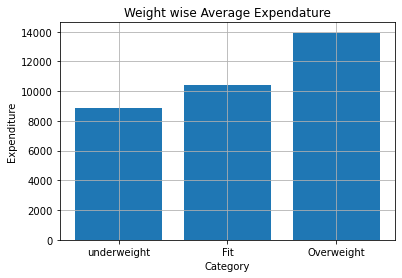

In [26]:
# Bar Chart
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
Average_Expendature = [8852.20,10404.90,13936.62]
Category = ['underweight','Fit','Overweight']
x_pos = np.arange(len(Category))
plt.bar(x = x_pos ,height = Average_Expendature)
plt.xticks(x_pos,Category)
plt.title("Weight wise Average Expendature")
plt.xlabel('Category')
plt.ylabel('Expenditure')
plt.grid()
plt.show()

# 13. Draw line plot of expenditure against age

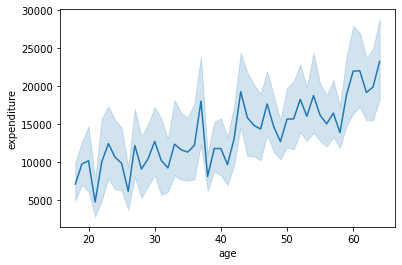

In [31]:
import seaborn as sns

total_expendature = sns.lineplot(data=df,x='age',y='expenditure')




# Draw line plot of expenditure against BMI

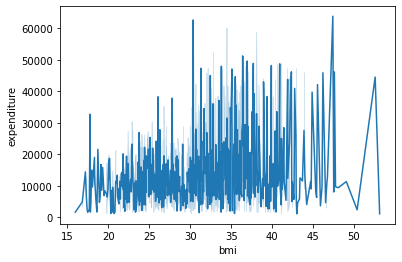

In [29]:
import seaborn as sns

total_expendature = sns.lineplot(data=df,x='bmi',y='expenditure')



# 14. Draw a bar chart to show zone wise average expenditure

            expenditure
zone                   
east       13774.679941
north      14102.583403
northeast  13694.721724
northwest  12151.702619
south      14715.689519
southeast  14452.949680
southwest  12717.083869
west       12182.998872


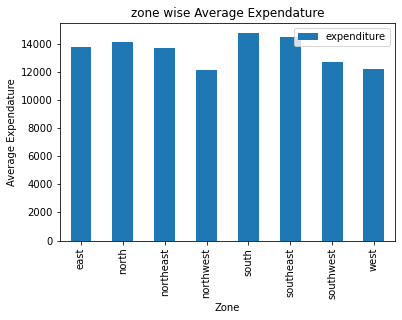

In [38]:
avg_expd =pd.pivot_table(df, values = 'expenditure',  index = 'zone', aggfunc = np.mean)
print(avg_expd)
avg_expd.plot(kind='bar')
plt.title("zone wise Average Expendature")
plt.xlabel('Zone')
plt.ylabel('Average Expendature')
plt.show()

 # 15. Draw a bar chart to show smoking and alcoholic habits against average expenditure

smoke             no           yes
alcohol                           
daily    8462.115558  31160.402608
no       8628.618182  32224.657378
party    8295.247250  31487.938163
rarely   5785.022944  31881.367379
weekend  8784.631185  33592.294629


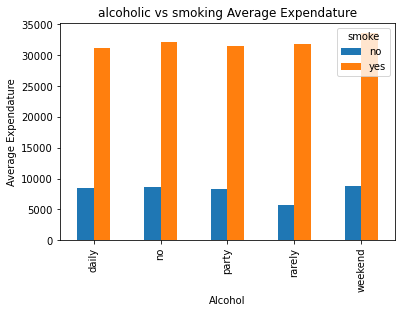

In [39]:
alcoholic_vs_smoking =pd.pivot_table(df, values = 'expenditure',  index = 'alcohol',columns = 'smoke', aggfunc = np.mean)
print(alcoholic_vs_smoking)
alcoholic_vs_smoking.plot(kind = 'bar')
plt.title("alcoholic vs smoking Average Expendature")
plt.xlabel('Alcohol')
plt.ylabel('Average Expendature')
plt.show()

# 16. Draw pie chart for alcohol consumption habits

daily      395
weekend    347
party      278
no         259
rarely      59
Name: alcohol, dtype: int64


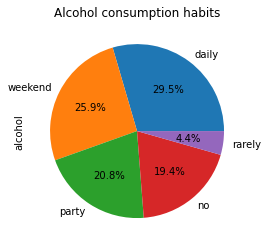

In [54]:
alcohol_consumption = df['alcohol'].value_counts()
print(alcohol_consumption)
alcohol_consumption.plot(kind = 'pie',autopct = '%1.1f%%')
plt.title('Alcohol consumption habits')
plt.show()


 # 17. Draw scatterplot to see the relation between age and expenditure, keep smoking habit as hue

<AxesSubplot:xlabel='age', ylabel='expenditure'>

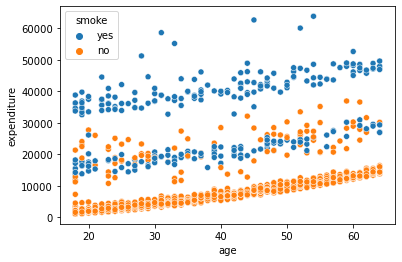

In [40]:
import seaborn as sns
sns.scatterplot(data=df,x='age',y='expenditure',hue='smoke')
    
    

# 18.Draw distribution plot of expenditure

C:\Users\Aparna Yadav\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


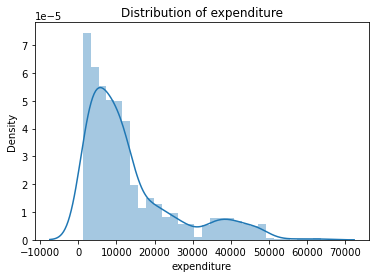

In [43]:
sns.distplot(a=df['expenditure'])
plt.title("Distribution of expenditure")
plt.show()

# 19. Pairplot

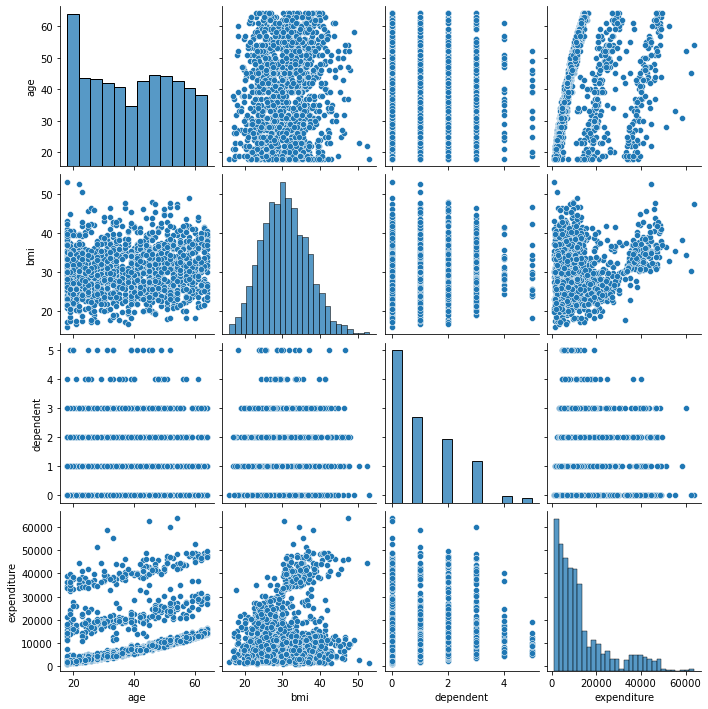

In [44]:
sns.pairplot(df)

# 20. Display heatmap for the data

<AxesSubplot:>

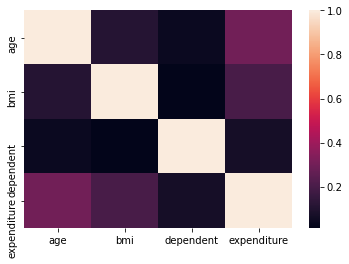

In [57]:
import seaborn as sns
sns.heatmap(data = df.corr())